## 1. 라이브러리 임포트

In [ ]:
import numpy as np
import pandas as pd

## 2. 파일 읽어오기

In [ ]:
# AI-HUB 감성 대화 말뭉치 활용하여 만든 데이터 읽어오기
final_data = pd. [칸 채우기] ('https://github.com/ohgzone/file1/raw/main/aihub_coupus.csv' )

In [ ]:
# 데이터 확인하기
final_data.head()

,감정,문장
0,분노,일은 왜 해도 해도 끝이 없을까? 화가 난다.
1,분노,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.
2,분노,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...
3,분노,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...
4,분노,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.


In [ ]:
# 총 51,630건
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51630 entries, 0 to 51629
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   감정      51630 non-null  object
 1   문장      51630 non-null  object
dtypes: object(2)
memory usage: 806.8+ KB


## 3. 영문, 숫자, 특수문자 제거

In [ ]:
# '문장' 컬럼의 내용중에 영문, 특수문자 있는지 확인 : 영문과 특수문자 존재 확인
final_data[final_data['문장'].str.contains('[^가-힣 ]')].values[:10]

array([['분노', '일은 왜 해도 해도 끝이 없을까? 화가 난다.'],
       ['분노', '이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.'],
       ['분노', '회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스트레스 받아. '],
       ['분노', '직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 섭섭해.'],
       ['분노', '얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.'],
       ['분노', '직장에 다니고 있지만 시간만 버리는 거 같아. 진지하게 진로에 대한 고민이 생겨.'],
       ['분노', '성인인데도 진로를 아직도 못 정했다고 부모님이 노여워하셔. 나도 섭섭해.'],
       ['기쁨', '퇴사한 지 얼마 안 됐지만 천천히 직장을 구해보려고.'],
       ['불안', '졸업반이라서 취업을 생각해야 하는데 지금 너무 느긋해서 이래도 되나 싶어.'],
       ['기쁨', '요즘 직장생활이 너무 편하고 좋은 것 같아!']], dtype=object)

In [ ]:
# '문장' 컬럼의 내용에서 숫자, 영문자, 특수문자등의 글자는 삭제처리
# final_data['문장'].replace('[^가-힣 ]','', regex=True) : 이렇게도 가능

final_data['문장'] = final_data['문장'].str.replace('[^가-힣 ]','', regex=True)

<ipython-input-70-9f86755da881>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  final_data['문장'] = final_data['문장'].str.replace('[^가-힣 ]','')


In [ ]:
# '문장' 컬럼의 내용에서 영문, 특수문자 없음 확인
final_data['문장'][final_data['문장'].str. [칸 채우기] ('[^가-힣 ]')].sum()

0

In [ ]:
# 숫자, 영문자, 특수문자 등 제거후 데이터 확인하기.
final_data.head()

,감정,문장
0,분노,일은 왜 해도 해도 끝이 없을까 화가 난다
1,분노,이번 달에 또 급여가 깎였어 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나
2,분노,회사에 신입이 들어왔는데 말투가 거슬려 그런 애를 매일 봐야 한다고 생각하니까 스트...
3,분노,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜 일도 많은 데 정말 분하고 섭섭해
4,분노,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나


## 4. 전처리 : Null, 중복 제거

In [ ]:
# final_data 어떤 컬럼과 내용으로 되어 있는지 다시 확인
final_data.tail()

,감정,문장
51625,분노,나이가 먹고 이제 돈도 못 벌어 오니까 어떻게 살아가야 할지 막막해 능력도 없고
51626,불안,몸이 많이 약해졌나 봐 이제 전과 같이 일하지 못할 것 같아 너무 짜증 나
51627,상처,이제 어떻게 해야 할지 모르겠어 남편도 그렇고 노후 준비도 안 되어서 미래가 걱정돼
51628,불안,몇십 년을 함께 살았던 남편과 이혼했어 그동안의 세월에 배신감을 느끼고 너무 화가 나
51629,상처,남편과 결혼한 지 사십 년이야 이제 사람 만나는 것도 버겁고 알던 사람도 점점 사라져


In [ ]:
# '문장' 컬럼의 내용을 양끝의 빈공간 삭제
final_data['문장'] = final_data['문장'].str.strip()

In [ ]:
# 데이터 다시 확인
final_data.tail()

,감정,문장
51625,분노,나이가 먹고 이제 돈도 못 벌어 오니까 어떻게 살아가야 할지 막막해 능력도 없고
51626,불안,몸이 많이 약해졌나 봐 이제 전과 같이 일하지 못할 것 같아 너무 짜증 나
51627,상처,이제 어떻게 해야 할지 모르겠어 남편도 그렇고 노후 준비도 안 되어서 미래가 걱정돼
51628,불안,몇십 년을 함께 살았던 남편과 이혼했어 그동안의 세월에 배신감을 느끼고 너무 화가 나
51629,상처,남편과 결혼한 지 사십 년이야 이제 사람 만나는 것도 버겁고 알던 사람도 점점 사라져


In [ ]:
# Null 있는지 확인 : 없음
final_data. [칸 채우기] ().sum()

감정    0
문장    0
dtype: int64

In [ ]:
# 중복 데이터 있는지 확인 : 56건 중복 존재 확인
final_data['문장'].duplicated().sum()

56

In [ ]:
# 중복 데이터 제거
final_data. [칸 채우기] (subset=['문장'], inplace=True)

In [ ]:
# 기존 51,630건 --> 이후 51,574건 : 56건 중복 삭제 확인
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51574 entries, 0 to 51629
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   감정      51574 non-null  object
 1   문장      51574 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


## 5. Label 분포 확인

In [ ]:
# label '감정' 분포 확인 : 총 6개이며, 고루게 분포 확인. 단 기쁨이 약간 부족해 보임
final_data['감정']. [칸 채우기] ()

불안    9311
분노    9149
상처    9130
슬픔    9118
당황    8747
기쁨    6119
Name: 감정, dtype: int64

<Axes: >

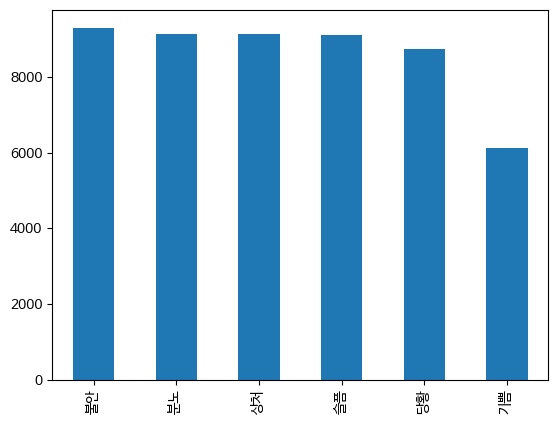

In [ ]:
# plot Bar차트 그리기
final_data['감정'].value_counts().plot(kind='bar')

## 6. label 숫자로 인코딩

In [ ]:
# 라벨와 클래스을 매핑 작업
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
final_data['감정'] = encoder. [칸 채우기] (final_data['감정'])
encoder.classes_

array(['기쁨', '당황', '분노', '불안', '상처', '슬픔'], dtype=object)

In [ ]:
final_data.tail()

,감정,문장
51625,2,나이가 먹고 이제 돈도 못 벌어 오니까 어떻게 살아가야 할지 막막해 능력도 없고
51626,3,몸이 많이 약해졌나 봐 이제 전과 같이 일하지 못할 것 같아 너무 짜증 나
51627,4,이제 어떻게 해야 할지 모르겠어 남편도 그렇고 노후 준비도 안 되어서 미래가 걱정돼
51628,3,몇십 년을 함께 살았던 남편과 이혼했어 그동안의 세월에 배신감을 느끼고 너무 화가 나
51629,4,남편과 결혼한 지 사십 년이야 이제 사람 만나는 것도 버겁고 알던 사람도 점점 사라져


## 7. X, Y 분리

In [ ]:
# X, Y 분리
features = final_data['문장'].values
labels = final_data['감정'].values

In [ ]:
features.shape, labels.shape

((51574,), (51574,))

In [ ]:
# features 내용 3개 출력
features[:3]

array(['일은 왜 해도 해도 끝이 없을까 화가 난다',
       '이번 달에 또 급여가 깎였어 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나',
       '회사에 신입이 들어왔는데 말투가 거슬려 그런 애를 매일 봐야 한다고 생각하니까 스트레스 받아'],
      dtype=object)

In [ ]:
print('이벤트 문자열 최대 길이 :{}'.format(max(len(l) for l in features)))
print('이벤트 문자열 평균 길이 :{}'.format(sum(map(len, features))/len(features)))

이벤트 문자열 최대 길이 :152
이벤트 문자열 평균 길이 :33.91709000659247


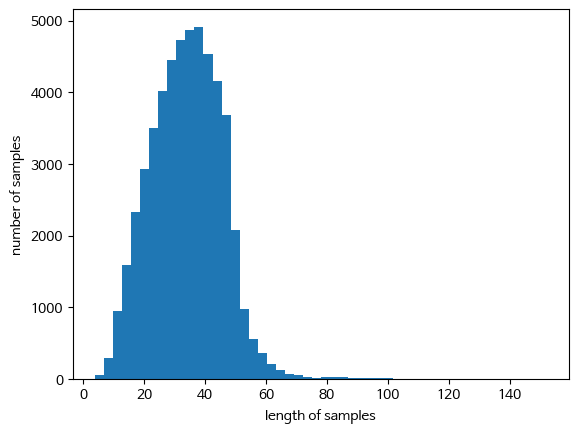

In [ ]:
# 히스토그램을 보면 30~40 부근에 많이 몰려 있음 알수 있다.
plt.hist([len(s) for s in features], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

## 8. train set와 test set 분리

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = [칸 채우기] (features, labels , test_size=0.2, stratify=labels, random_state=41)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((41259,), (10315,), (41259,), (10315,))

In [ ]:
# 샘플확인 , 라벨 확인
# {0: '불안', 1: '분노', 2: '상처', 3: '슬픔', 4: '당황', 5: '기쁨'}

x_train[:2], y_train[:2]

(array(['건강 검진을 했는데 위암이 발견되었어 술을 너무 많이 마신 탓이야',
        '내가 대학에 갈 수 있을까 난 성적이 안 좋아서 좋은 대학은 못 갈 거야'], dtype=object),
 array([2, 2]))

In [ ]:
# 말뭉치를 TF-IDF로 변환하기
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
x_train_v = tfidf.fit_transform(x_train)
x_test_v = tfidf. [칸 채우기] (x_test)

In [ ]:
# 각 라인의 각 단어에 대한 TF-IDF 값 표현
print(x_train_v)

In [ ]:
# 학습데이터셋의 TF-IDF 매트릭스 확인하기 : 41259 라인, 47366 단어
x_train_v.shape

(41259, 47366)

## 9. 머신러닝 모델링

In [ ]:
# 학습하는데 Colab에서 4분 소요
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier() # 모델 정의
rfc. [칸 채우기] (x_train_v, y_train) # 모델 학습

rfc.score(x_test_v, y_test)

0.5024721279689772

### 10. 예측해 보기

In [ ]:
# 출력 결과 해석 : (0, 44327)	0.241660101642553
# 0 : 첫라인, 44327 : 단어에 맵핑된 번호, 0.241660101642553 : tf-idf 계산 값

print(f'검증데이터셋의 첫번째 TF-IDF : {x_test_v[0]}')

TF-IDF :   (0, 44327)	0.241660101642553
  (0, 41703)	0.31111324348104824
  (0, 33660)	0.2448445072222418
  (0, 28457)	0.31179323030597017
  (0, 21156)	0.366699961635644
  (0, 13416)	0.42025584693136303
  (0, 12582)	0.20749688472303796
  (0, 11829)	0.5118450810111635
  (0, 10803)	0.26743393755207734


In [ ]:
print(f'검증데이터셋의 첫번째 TF-IDF 역변환 : {tfidf.inverse_transform(x_test_v[:1])}')

검증데이터셋의 첫번째 TF-IDF 역변환 : [array(['하는', '친구들은', '일을', '어려워', '사실', '만나기가', '때문에', '든다는', '돈이'],
      dtype='<U22')]


In [ ]:
# RandomForest 모델로 예측하기
predict = rfc. [칸 채우기] (x_test_v[:1])
predict, encoder.inverse_transform(predict)

(array([4]), array(['상처'], dtype=object))

<br>
<br>
<br>
<br>

# 배운 내용 정리
1. AI-HUB 감정말뭉치 데이터 읽어오고
2. 데이터 전처리 : 한글, 공백외의 영어, 숫자, 특수문자등 제거
3. TF-IDF 토큰나이져 활용하여 토큰화하고 문장을 숫자로 나열
4. 머신러닝 RandomForest 모델을 활용하여 감성분류 수행


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# B. LTSM 모델 이용하여 Classification하기
+ AI-HUB 감정말뭉치 데이터를 가지고
+ LSTM 모델학습하여 감정 뷴류 보겠습니다.

<br>
<br>

## 1. 라이브러리 임포트

In [ ]:
import numpy as np
import pandas as pd

## 2. 파일 읽어오기

In [ ]:
# AI-HUB 감성 대화 말뭉치 활용하여 만든 데이터 읽어오기
final_data = pd. [칸 채우기] ('https://github.com/ohgzone/file1/raw/main/aihub_coupus.csv' )

In [ ]:
# 데이터 확인하기
final_data.head()

,감정,문장
0,분노,일은 왜 해도 해도 끝이 없을까? 화가 난다.
1,분노,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.
2,분노,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...
3,분노,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...
4,분노,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.


In [ ]:
# 총 51,630건
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51630 entries, 0 to 51629
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   감정      51630 non-null  object
 1   문장      51630 non-null  object
dtypes: object(2)
memory usage: 806.8+ KB


## 3. 영문, 숫자 특수문자 제거

In [ ]:
# '문장' 컬럼의 내용중에 영문, 특수문자 있는지 확인 : 영문과 특수문자 존재 확인
final_data[final_data['문장'].str.contains('[^가-힣 ]')].values[:10]

array([['분노', '일은 왜 해도 해도 끝이 없을까? 화가 난다.'],
       ['분노', '이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.'],
       ['분노', '회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스트레스 받아. '],
       ['분노', '직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 섭섭해.'],
       ['분노', '얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.'],
       ['분노', '직장에 다니고 있지만 시간만 버리는 거 같아. 진지하게 진로에 대한 고민이 생겨.'],
       ['분노', '성인인데도 진로를 아직도 못 정했다고 부모님이 노여워하셔. 나도 섭섭해.'],
       ['기쁨', '퇴사한 지 얼마 안 됐지만 천천히 직장을 구해보려고.'],
       ['불안', '졸업반이라서 취업을 생각해야 하는데 지금 너무 느긋해서 이래도 되나 싶어.'],
       ['기쁨', '요즘 직장생활이 너무 편하고 좋은 것 같아!']], dtype=object)

In [ ]:
# '문장' 컬럼의 내용에서 숫자, 영문자, 특수문자등의 글자는 삭제처리
final_data['문장'] = final_data['문장'].str.replace('[^가-힣 ]','', regex=True)

<ipython-input-8-9f86755da881>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  final_data['문장'] = final_data['문장'].str.replace('[^가-힣 ]','')


In [ ]:
# '문장' 컬럼의 내용에서 영문, 특수문자 없음 확인
final_data['문장'][final_data['문장'].str. [칸 채우기] ('[^가-힣 ]')].sum()

0

In [ ]:
# 숫자, 영문자, 특수문자 등 제거후 데이터 확인하기.
final_data.head()

,감정,문장
0,분노,일은 왜 해도 해도 끝이 없을까 화가 난다
1,분노,이번 달에 또 급여가 깎였어 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나
2,분노,회사에 신입이 들어왔는데 말투가 거슬려 그런 애를 매일 봐야 한다고 생각하니까 스트...
3,분노,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜 일도 많은 데 정말 분하고 섭섭해
4,분노,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나


## 4. 전처리 : Null, 중복 제거

In [ ]:
# final_data 어떤 컬럼과 내용으로 되어 있는지 다시 확인
final_data.tail()

,감정,문장
51625,분노,나이가 먹고 이제 돈도 못 벌어 오니까 어떻게 살아가야 할지 막막해 능력도 없고
51626,불안,몸이 많이 약해졌나 봐 이제 전과 같이 일하지 못할 것 같아 너무 짜증 나
51627,상처,이제 어떻게 해야 할지 모르겠어 남편도 그렇고 노후 준비도 안 되어서 미래가 걱정돼
51628,불안,몇십 년을 함께 살았던 남편과 이혼했어 그동안의 세월에 배신감을 느끼고 너무 화가 나
51629,상처,남편과 결혼한 지 사십 년이야 이제 사람 만나는 것도 버겁고 알던 사람도 점점 사라져


In [ ]:
# '문장' 컬럼의 내용을 양끝의 빈공간 삭제
final_data['문장'] = final_data['문장'].str. [칸 채우기] ()

In [ ]:
# 데이터 다시 확인
final_data.tail()

,감정,문장
51625,분노,나이가 먹고 이제 돈도 못 벌어 오니까 어떻게 살아가야 할지 막막해 능력도 없고
51626,불안,몸이 많이 약해졌나 봐 이제 전과 같이 일하지 못할 것 같아 너무 짜증 나
51627,상처,이제 어떻게 해야 할지 모르겠어 남편도 그렇고 노후 준비도 안 되어서 미래가 걱정돼
51628,불안,몇십 년을 함께 살았던 남편과 이혼했어 그동안의 세월에 배신감을 느끼고 너무 화가 나
51629,상처,남편과 결혼한 지 사십 년이야 이제 사람 만나는 것도 버겁고 알던 사람도 점점 사라져


In [ ]:
# Null 있는지 확인 : 없음
final_data. [칸 채우기] ().sum()

감정    0
문장    0
dtype: int64

In [ ]:
# 중복 데이터 있는지 확인 : 56건 중복 존재 확인
final_data['문장'].duplicated().sum()

56

In [ ]:
# 중복 데이터 제거
final_data. [칸 채우기] (subset=['문장'], inplace=True)

In [ ]:
# 기존 51,630건 --> 이후 51,574건 : 56건 중복 삭제 확인
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51574 entries, 0 to 51629
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   감정      51574 non-null  object
 1   문장      51574 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


## 5. Label 분포 확인

In [ ]:
# label '감정' 분포 확인 : 총 6개이며, 고루게 분포 확인. 단 기쁨이 약간 부족해 보임
final_data['감정']. [칸 채우기] ()

불안    9311
분노    9149
상처    9130
슬픔    9118
당황    8747
기쁨    6119
Name: 감정, dtype: int64

<Axes: >

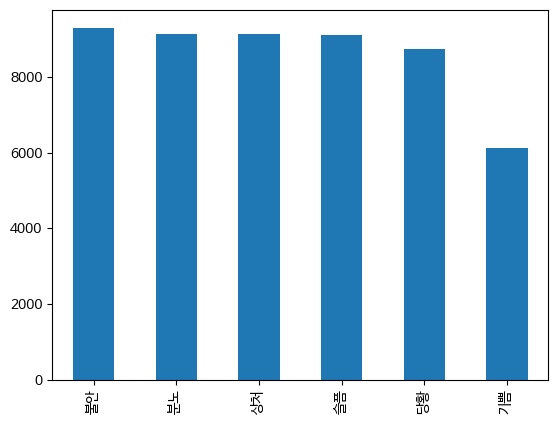

In [ ]:
# plot Bar차트 그리기
final_data['감정'].value_counts().plot(kind='bar')

## 6. label 숫자로 인코딩

In [ ]:
# 감정 리스트 만듬
list1 = final_data['감정'].value_counts().index.values
list1

array(['불안', '분노', '상처', '슬픔', '당황', '기쁨'], dtype=object)

In [ ]:
# 라벨와 클래스을 매핑 작업
label2class = {}
class2label = {}
for cl, la in enumerate(list1):
  # print(i, j)
  label2class[la] = cl
  class2label[cl] = la

print(label2class)
print(class2label)

{'불안': 0, '분노': 1, '상처': 2, '슬픔': 3, '당황': 4, '기쁨': 5}
{0: '불안', 1: '분노', 2: '상처', 3: '슬픔', 4: '당황', 5: '기쁨'}


In [ ]:
# '감정' 라벨링 수행
final_data['label'] = final_data['감정'].map(label2class)

In [ ]:
final_data.tail()

,감정,문장,label
51625,분노,나이가 먹고 이제 돈도 못 벌어 오니까 어떻게 살아가야 할지 막막해 능력도 없고,1
51626,불안,몸이 많이 약해졌나 봐 이제 전과 같이 일하지 못할 것 같아 너무 짜증 나,0
51627,상처,이제 어떻게 해야 할지 모르겠어 남편도 그렇고 노후 준비도 안 되어서 미래가 걱정돼,2
51628,불안,몇십 년을 함께 살았던 남편과 이혼했어 그동안의 세월에 배신감을 느끼고 너무 화가 나,0
51629,상처,남편과 결혼한 지 사십 년이야 이제 사람 만나는 것도 버겁고 알던 사람도 점점 사라져,2


## 7. X, Y 분리

In [ ]:
# X, Y 분리
features = final_data['문장'].values
labels = final_data['label'].values

In [ ]:
features.shape, labels.shape

((51574,), (51574,))

In [ ]:
# features 내용 3개 출력
features[:3]

array(['일은 왜 해도 해도 끝이 없을까 화가 난다',
       '이번 달에 또 급여가 깎였어 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나',
       '회사에 신입이 들어왔는데 말투가 거슬려 그런 애를 매일 봐야 한다고 생각하니까 스트레스 받아'],
      dtype=object)

In [ ]:
print('이벤트 문자열 최대 길이 :{}'.format(max(len(l) for l in features)))
print('이벤트 문자열 평균 길이 :{}'.format(sum(map(len, features))/len(features)))

이벤트 문자열 최대 길이 :152
이벤트 문자열 평균 길이 :33.91709000659247


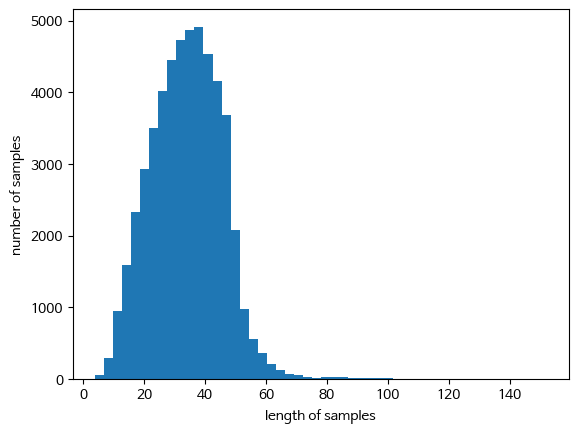

In [ ]:
# 히스토그램을 보면 30~40 부근에 많이 몰려 있음 알수 있다.
plt.hist([len(s) for s in features], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

## 8. train set와 test set 분리

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =  [칸 채우기] (features, labels , test_size=0.2, stratify=labels, random_state=41)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((41259,), (10315,), (41259,), (10315,))

In [ ]:
# 샘플확인 , 라벨 확인
# {0: '불안', 1: '분노', 2: '상처', 3: '슬픔', 4: '당황', 5: '기쁨'}

x_train[:2], y_train[:2]

(array(['아르바이트만 하다가 취업하려니 거부감 들어', '혼자가 편하다고 한 게 후회돼'], dtype=object),
 array([1, 4]))

## 9. 전체 문장에 대해 Tokenizing
+ 컴퓨터가 이해하기 위해 모든 단어를 숫자로 변환해야 함.
+ 단어 빈도수 따지지 않고 무조건 모든 단어 수용해서 진행

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Tokenizer 구현 : 단어 사전 만들기(fit_on_texts)
tokenizer = Tokenizer()
tokenizer. [칸 채우기] (x_train)

In [2]:
# 단어에 대한 숫자 매핑
# print(tokenizer.word_index)

In [1]:
# 반대로 숫자로 단어 매핑
# print(tokenizer.index_word)

In [3]:
# 단어별 빈도수 확인
print(tokenizer.word_counts)

NameError: name 'tokenizer' is not defined

In [ ]:
# 총 단어 갯수 : 47,646
max_words = len(tokenizer.index_word)
print(max_words)

47646


## 10. texts_to_sequences : 문장을 숫자로 나열
- 빈도수 적은 단어 제외하는것 없이 모든 단어 포함해서 진행
- 그리고, 예를 들어 1번 등장하는 단어는 삭제하는 작업은 필요시 수행!!

In [ ]:
# 문장을 숫자로 나열
x_train_seq = tokenizer. [칸 채우기] (x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

In [ ]:
# 문장을 숫자로 변경후 갯수 확인
# x_train.shape, x_test.shape, y_train.shape, y_test.shape : ((41259,), (10315,), (41259,), (10315,))
print(len(x_train_seq), len(x_test_seq))

41259 10315


In [ ]:
print(x_train[1:3])
print(x_train_seq[1:3])

['혼자가 편하다고 한 게 후회돼' '나 부모님께 너무 죄송한 마음이 들어']
[[1664, 8292, 40, 15, 195], [5, 232, 1, 3601, 59, 24]]


## 11. Padding Sequence

In [ ]:
# 문장의 최대 길이 파악 : 제일 긴 문장 seq 길이는 38개로 구성됨.
max(len(line) for line in x_train_seq)

38

In [ ]:
# 모든 문장을 최대 문장 Seq 길이 38에 맞춘다.
x_train_pad =  [칸 채우기] (x_train_seq, maxlen=38)
x_test_pad = pad_sequences(x_test_seq, maxlen=38)

In [ ]:
# 문장 Seq 내용을 보니 잘 패딩되어 있음 확인
x_train_pad[:1]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,  6210,   708, 20133,
        20134,    24]], dtype=int32)

In [ ]:
# 문장 Seq 패딩의 shape 확인
x_train_pad.shape, x_test_pad.shape

((41259, 38), (10315, 38))

## 12. LSTM 모델링

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPool2D
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, SimpleRNN, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# 하이퍼 파라미터

max_words = 47646 + 1    # 총 단어 갯수 + padding 0 번호
max_len = 38             # 최대 문장 길이
embedding_dim = 32      # embedding 차원

In [ ]:
# 모델 선언
model =  [칸 채우기] ()

In [ ]:
# 단어를 의미있는 32 차원으로 Vector 변경(Embedding)
model.add( [칸 채우기] (max_words, embedding_dim, input_length=max_len))

In [ ]:
# LSTM 모델
model.add( [칸 채우기] (16, return_sequences=True))
model.add(LSTM(16, return_sequences=True))
model.add(Flatten())
model.add(Dense(128, activation='swish'))
model.add(Dense(32, activation='swish'))
model.add(Dense(6, activation=' [칸 채우기] '))

# 모델 compile
model. [칸 채우기] (loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = 'accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 38, 32)            1524704   
                                                                 
 lstm (LSTM)                 (None, 38, 16)            3136      
                                                                 
 lstm_1 (LSTM)               (None, 38, 16)            2112      
                                                                 
 flatten (Flatten)           (None, 608)               0         
                                                                 
 dense (Dense)               (None, 128)               77952     
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 6)                 1

In [ ]:
# 조기종료 콜백함수 정의(EarlyStopping)
es =  [칸 채우기] (monitor='val_loss', patience=10, verbose=1)

# 체크포인트 저장(ModelCheckpoint)
checkpoint_path = 'tmp_checkpoint.ckpt'
cp =  [칸 채우기] (checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True)

In [ ]:
# 모델 학습(fit)
history = model. [칸 채우기] (x_train_pad, y_train, epochs=50, batch_size=512,
                      validation_split=0.2, verbose =1, callbacks=[es, cp])

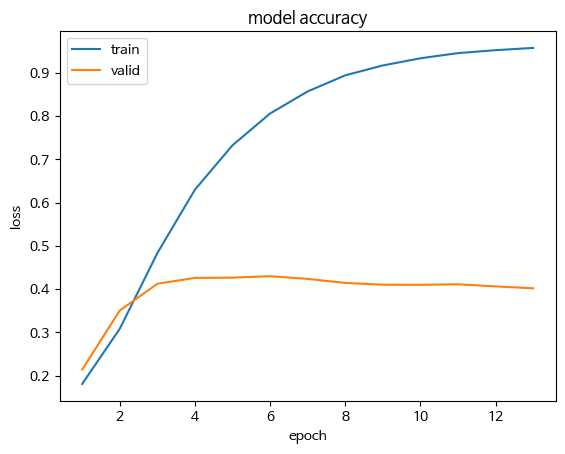

In [ ]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'])
plt.plot(epochs, history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], )
plt.show()

In [ ]:
model.evaluate(x_test_pad, y_test)

323/323 [==============================] - 1s 4ms/step - loss: 4.3564 - accuracy: 0.3934


[4.356448650360107, 0.3934076726436615]

### 13. 예측해 보기

In [ ]:
print(f'문자열 : {x_test[0]}')
print(f'Sequence : {x_test_pad[0]}')

문자열 : 눈 수술을 했더니 시력이 좋아졌어
Sequence : [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0 1954  412  493 2450  961]


In [ ]:
# 모델 예측하기(predict)
predict = model. [칸 채우기] (x_test_pad[:1])

1/1 [==============================] - 1s 849ms/step


In [ ]:
print(f'True : {class2label[y_test[0]]}')
print(f'Predict : {class2label[np.argmax(predict)]}')

True : 기쁨
Predict : 상처


# 배운 내용 정리
1. AI-HUB 감정말뭉치 데이터 읽어오고
2. 데이터 전처리 : 한글, 공백외의 영어, 숫자, 특수문자등 제거
3. keras 토큰나이져 활용하여 토큰화하고 문장을 숫자로 나열(texts_tp_sequences)
4. 일정 크기의 문장으로 맞추기 위해 패딩수행(pad_sequences)
4. embedding 레이어를 이용해서 단어를 n차원 밀집벡터를 만들고 train시에 학습되도록 했숩니다.
5. LSTM 언어 모델을 활용하여 감성분류 수행
